In [3]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [4]:
# Loading data
df = pd.read_csv('college_admissions.csv')
# Checking column names 
print(df.columns)

Index(['super_opeid', 'name', 'par_income_bin', 'par_income_lab', 'attend',
       'stderr_attend', 'attend_level', 'attend_sat', 'stderr_attend_sat',
       'attend_level_sat', 'rel_apply', 'stderr_rel_apply', 'rel_attend',
       'stderr_rel_attend', 'rel_att_cond_app', 'rel_apply_sat',
       'stderr_rel_apply_sat', 'rel_attend_sat', 'stderr_rel_attend_sat',
       'rel_att_cond_app_sat', 'attend_instate', 'stderr_attend_instate',
       'attend_level_instate', 'attend_instate_sat',
       'stderr_attend_instate_sat', 'attend_level_instate_sat',
       'attend_oostate', 'stderr_attend_oostate', 'attend_level_oostate',
       'attend_oostate_sat', 'stderr_attend_oostate_sat',
       'attend_level_oostate_sat', 'rel_apply_instate',
       'stderr_rel_apply_instate', 'rel_attend_instate',
       'stderr_rel_attend_instate', 'rel_att_cond_app_instate',
       'rel_apply_oostate', 'stderr_rel_apply_oostate', 'rel_attend_oostate',
       'stderr_rel_attend_oostate', 'rel_att_cond_app_oost

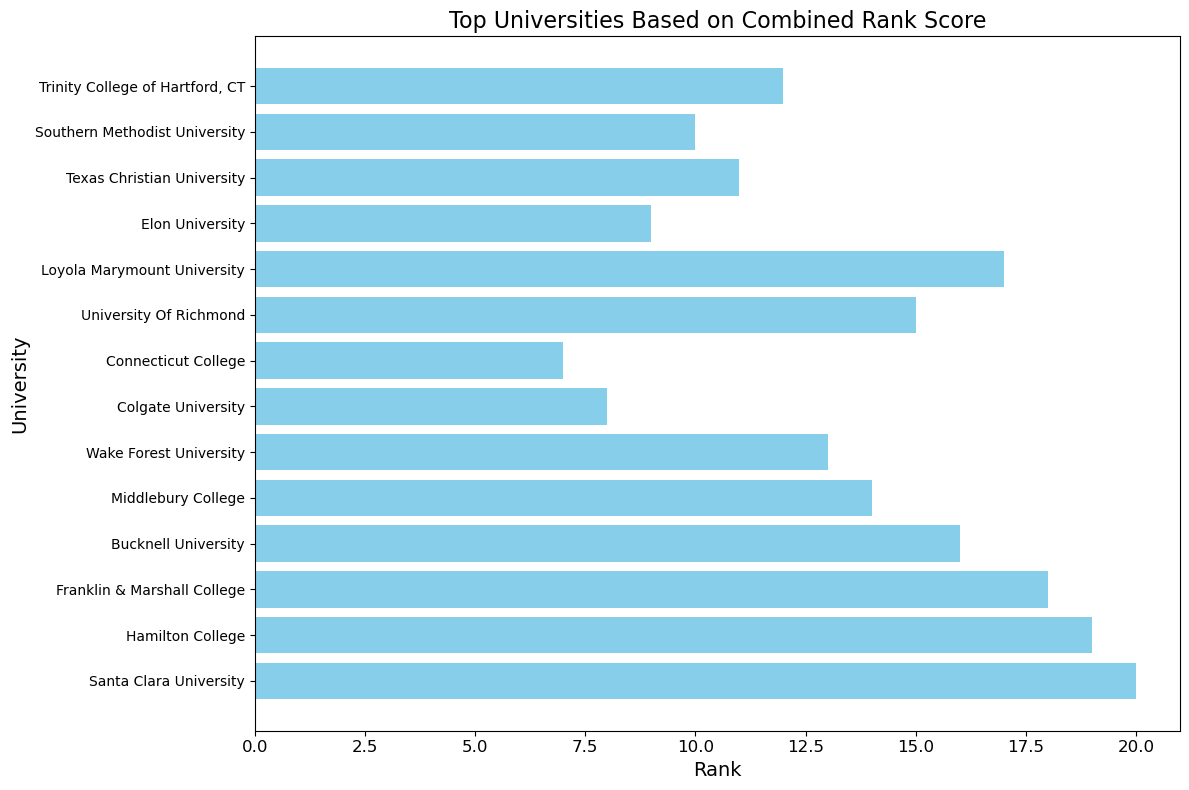

                                 name  rank_score  rank
1147  Trinity College of Hartford, CT    2.938890     1
1035    Southern Methodist University    2.715931     2
1133       Texas Christian University    2.346106     3
475                   Elon University    2.260270     4
713       Loyola Marymount University    2.234065     5


In [6]:
# Creating a new column 'rank_score' by combining different factors
# Here, we take take the average of 'attend', 'attend_sat', and 'rel_apply'n(3 different variables)
df['rank_score'] = df[['attend', 'attend_sat', 'rel_apply']].mean(axis=1)

# Then we sort based on the proprtionate 'rank_score'
df_sorted = df[['name', 'rank_score']].sort_values(by='rank_score', ascending=False)

# Rank in the sorted order
df_sorted['rank'] = range(1, len(df_sorted) + 1)

# Limit the plot to the top N universities (top 20 here)
top_n = 20
df_top_n = df_sorted.head(top_n)

# Plot the universities based on their rank
plt.figure(figsize=(12, 8)) 
plt.barh(df_top_n['name'], df_top_n['rank'], color='skyblue')
plt.xlabel('Rank', fontsize=14)
plt.ylabel('University', fontsize=14)
plt.title(f'Top Universities Based on Combined Rank Score', fontsize=16)
plt.gca().invert_yaxis()

# Adjust font for readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.tight_layout()  
plt.show()

# Displaign the first few rows to check rankings
print(df_top_n.head())